# 기계학습(ML)
- 강화학습
- 지도학습
- 비지도학습

## 지도학습(Supervised Learning)
- 여러 문제와 답을 같이 학습함으로써 미지의 문제에 대한 올바른 답을 예측하고자 하는 방법
- 데이터에 레이블(정답)이 들어있는 학습
- 분류
- 회귀

### 분류(Classfication)
- 이진분류
- 다중분류

#### 이진분류
- 어떤 데이터에 대해 두 가지 중 하나로 분류할 수 있는 것

#### 다중분류
- 어떤 데이터에 대해 여러 값 중 하나로 분류할 수 있는 것

### 회귀(Regression)
- 어떤 데이터들의 특징(feature)를 토대로 값을 에측하는 것
- 결과 값은 실수 값을 가질 수 있다. (그 값들은 연속성을 갖는다. 그래프를 생각하면 됨)

## 비지도학습(Unsupervised Learning)
- 학습 알고리즘에 결과물이라고 할 수 있는 출력을 미리 제공하지 않고 인공지능(AI)이 입력 세트에서 패턴과 상관관계를 찾아내야 하는 머신러닝 알고리즘
- 군집(Clustering)
- 변환(Transform)
- 연관(Association)
- 자원축소(PCA)

## 강화학습(Reinforcemene Learning)
- 현재의 상태(State)에서 어떤 행동(Action)을 취하는 것이 최적인지를 학습하는 것

## k-Nearest Neighbors
- 지도학습 알고리즘
- 굉장히 직관적이고 간단
- 어떤 데이터가 주어지면 그 주변의 데이터를 본 뒤 많은 데이터가 포함되어 있는 범주로 분류
- kNN의 특징은 훈련이 필요 X. 다른 모델은 fit(X_train, Y_train)의 코드를 통해 훈련시킴.
- kNN은 훈련데이터를 저장하는게 훈련의 전부
- 모델을 별도로 구축하지 않아서 Lazy Model 이라고 부른다.

### 필요한 패키지 로딩

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# FutureWarning제거

%matplotlib inline

mpl.rcParams['font.family'] = 'D2coding'  # 한글 깨짐 해결
plt.rcParams['font.family']  # 폰트 확인

['D2coding']

In [19]:
!pip install mglearn

     -------------------------------------- 540.1/540.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=1a9503c473e279c1da9d21489b2bebdd0301d3510ebb72813412d2b5c319ab0a
  Stored in directory: c:\users\minim\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


### 데이터셋 로딩

In [2]:
# 도미 관측 데이터셋
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0,
                29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0,
                32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0,
                35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0,
                450.0, 500.0, 390.0, 450.0, 500.0,
                475.0, 500.0, 500.0, 340.0, 600.0,
                600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0,
                725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
# 빙어 관측 데이터셋
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2,
                11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8,
                8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

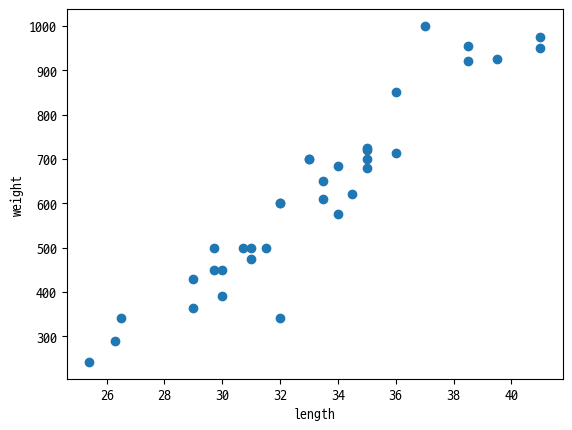

In [4]:
# 길이 x, 무게 y
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

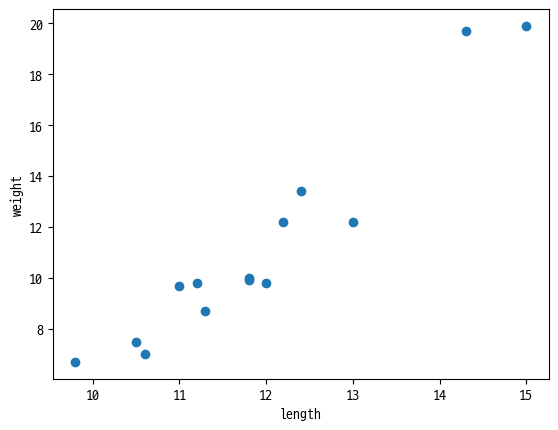

In [5]:
# 길이 x, 무게 y
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

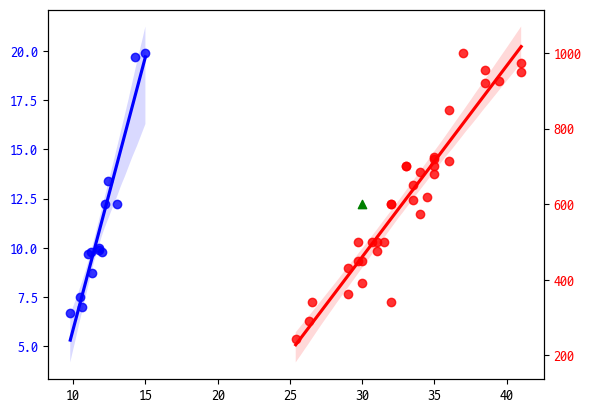

In [6]:
ax = plt.subplots()
ax1 = sns.regplot(x=smelt_length, y=smelt_weight, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2 = sns.regplot(x=bream_length, y=bream_weight, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2 = plt.scatter(30, 600, marker='^', color='green')

In [7]:
# 머신러닝 패키지를 사용할 경우 특성들을 2차원 Numpy 배열로 만들어줘야 함
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
# 2차원 배열을 생성하기 위해 zip()함수와 리스트 내포를 사용
# zip() : 나열된 리스트에서 요소를 하나씩 꺼내주는 함수
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data[0]

[25.4, 242.0]

In [9]:
# 도미(1), 빙어(0)
# 머신에서 찾고자 하는 것에 1을, 나머지는 0으로 처리
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## kNN 알고리즘 : 2진 분류 알고리즘

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# 인스턴스 객체 생성
knn = KNeighborsClassifier()

In [11]:
# 훈련 - 모델에 데이터를 전달하여 규칙을 학습하는 과정
model = knn.fit(fish_data, fish_target)
# 평가(정확도 검사)
model.score(fish_data, fish_target) * 100

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


100.0

In [12]:
# knn 모델
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

- algorithm = 'auto' : 최적의 알고리즘
- leaf_size = 30 : 메모리 점유율 30%
- metric : 거리 계산에 사용할 미터법(default = 'minkowski')
- metric_params : 메트릭 함수에 대한 추가 키워드 인수(default = 'None')
- n_jobs = None : 이웃 검색을 위해 실행할 병렬 작업의 수(None 이 아니면 1)
- n_neighbors = 5 : 범위 5
- weights = 'uniform' : hparam(가중치를 균등하게)

- KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
# 예측 - 새로운 데이터를 추가하여 분류하는 작업
# 길이 - 30, 무게 600인 데이터
knn.predict([[30, 600]])

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [14]:
new_data = [30, 600]

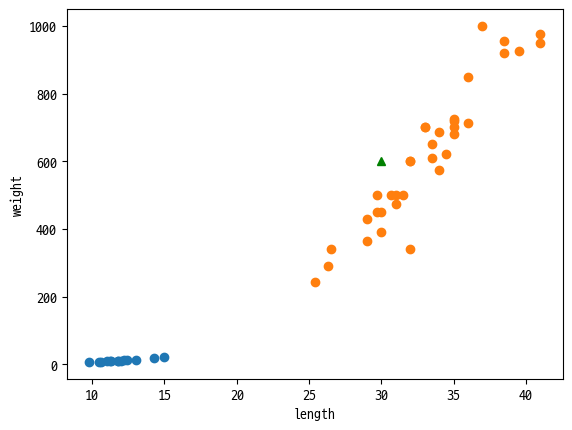

In [15]:
# 길이 x, 무게 y
plt.scatter(smelt_length, smelt_weight)
plt.scatter(bream_length, bream_weight)
plt.plot(30, 600, marker='^', color='g')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

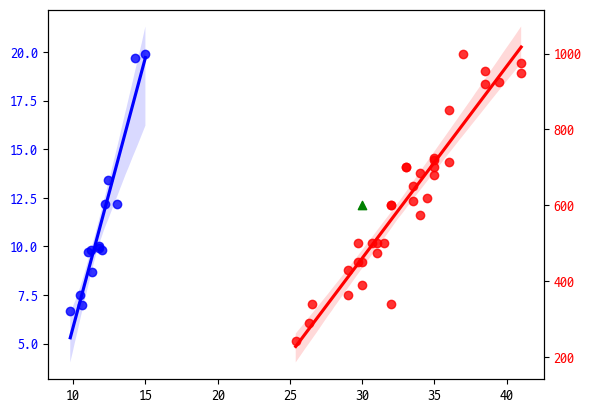

In [94]:
ax = plt.subplots()
ax1 = sns.regplot(x=smelt_length, y=smelt_weight, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2 = sns.regplot(x=bream_length, y=bream_weight, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2 = plt.scatter(30, 600, marker='^', color='green')

In [17]:
knn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [18]:
model._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [124]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

In [20]:
35/49

0.7142857142857143

### 훈련데이터와 테스트 데이터

In [21]:
print(type(fish_data))
print(type(fish_target))

<class 'list'>
<class 'list'>


In [34]:
# 훈련데이터 35개, 테스트데이터 14개 분리
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [35]:
knn = KNeighborsClassifier()
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.0

In [24]:
# numpy 배열을 이용하여 데이터를 섞음
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [33]:
input_arr.shape

(49, 2)

In [32]:
target_arr.shape

(49,)

In [39]:
# 주의할 점은 input과 target은 같은 위치에 함께 선택되어야 한다.
# 시드가 같으면 결과값이 같다
np.random.seed(42)
index = np.arange(49)
# shuffle()
np.random.shuffle(index)

In [43]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [47]:
print(input_arr[0], train_input[0])

[ 25.4 242. ] [ 32. 340.]


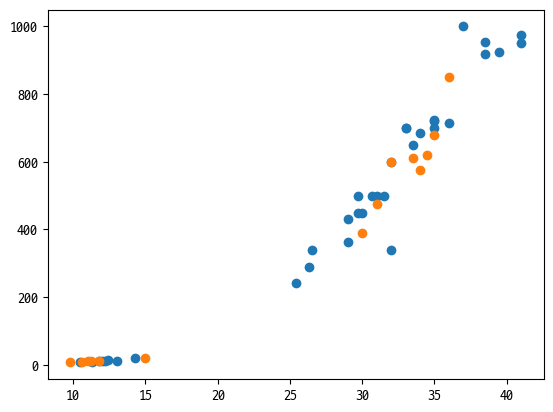

In [48]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.show()

In [49]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

## 데이터 전처리(data preprocessing)

In [50]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [53]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0,
               29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0,
               32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0,
               35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0,
               9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0,
               450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0,
               600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0,
               725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0,
               6.7, 7.5, 7.0, 9.7, 9.8,
               8.7, 10.0, 9.9, 9.8, 12.2,
               13.4, 12.2, 19.7, 19.9]

In [51]:
# column_stack()
np.column_stack([[1, 2, 3], [4, 5, 6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [54]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [55]:
# np.zeros(), np.ones()
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 훈련 데이터와 테스트 데이터 분리

In [58]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [61]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [60]:
# stratify : 클래스 비율에 맞춰서 데이터를 분리하도록 조정하는 옵션
# 훈련 데이터가 적거나 특정 클래스의 샘플 개수가 적을 때 유용하게 사용됨
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [64]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target) * 100

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


100.0

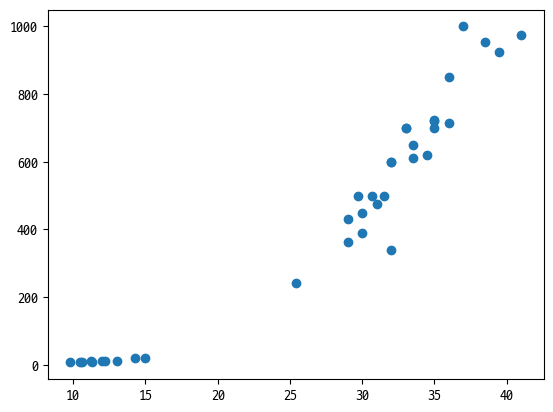

In [69]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.show()

In [75]:
kn.predict([[25, 150]])

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0.])

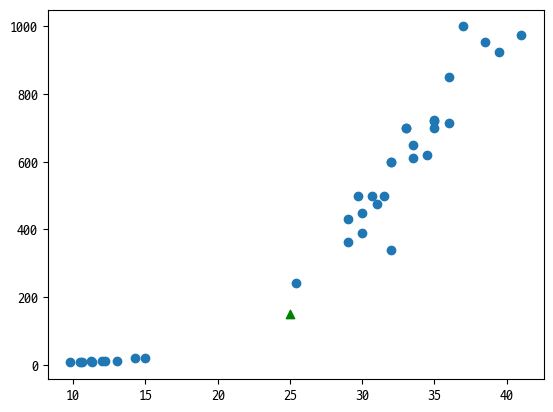

In [78]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^', color='green')
plt.show()

In [89]:
# Kneighbors() : 이웃까지의 거리와 이웃의 샘플의 인덱스를 반환하는 함수
distances, indexs = kn.kneighbors([[25, 150]])

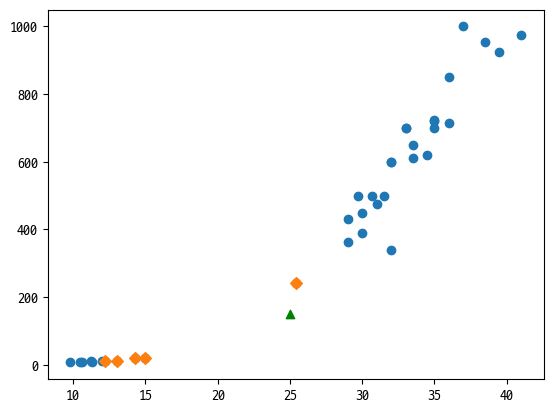

In [99]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^', color='green')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.show()

In [91]:
train_input[indexs]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [92]:
train_target[indexs]

array([[1., 0., 0., 0., 0.]])

In [97]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

### 피처 스케일링
- 두 특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다
- 최소 - 최대 정규화(min-max normalization) : X<sub>new</sub> = X - min(x) / max(x) - min(x)
- z-점수 표준화(standard z-value) : X<sub>new</sub> = X - mean(x) / std(x)

In [100]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [101]:
train_scaled = (train_input - mean) / std

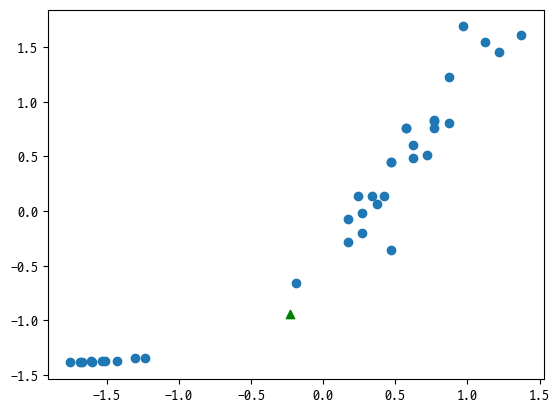

In [104]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^', color='green')
plt.show()

In [105]:
test_scaled = (test_input - mean) / std

In [111]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [112]:
kn.score(test_scaled, test_target)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [122]:
kn.predict([new])

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1.])

## 붓꽃(iris) 품종 분류 분석

### 데이터셋 로딩

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
# Bunch 클래스 객체는 파이썬의 딕셔너리와 비슷
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
iris['DESCR'][:193] + '\n'

NameError: name 'iris' is not defined

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail

<bound method NDFrame.tail of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [136]:
iris.data.shape

(150, 4)

In [137]:
iris.target.shape

(150,)

### 훈련데이터와 테스트 데이터 분리
- 훈련 데이터(훈련세트) : 머신러닝 모델을 만들 때 사용
- 테스트 데이터(테스트 세트, 홀드아웃세트) : 모델이 얼마나 잘 작동하는지 측정할때 사용

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [27]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


### 데이터 살펴보기

In [1]:
# iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
# ax = pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15),
#                                 marker='o', hist_kwds={'bins': 20},
#                                 s=60, alpha=.8)

In [2]:
# sns.pairplot(df, hue='species')

### kNN 최근접 이웃 알고리즘(단점 : 적절한 k의 선택이 필요)
- k가 너무 작을 때 : Overfitting(과대적합)
- k가 너무 클 때 : Underfitting(과소적합)
- 모델이 복잡할수록 훈련 데이터에 대해서는 더 정확하게 예측한다.
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

In [23]:
kn = KNeighborsClassifier(n_neighbors=1)

In [30]:
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
print('훈련세트의 정확도 : {:.2f}'.format(kn.score(X_train, y_train)*100))

훈련세트의 정확도 : 100.00


C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 예측하기

In [34]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape :', X_new.shape)

X_new.shape : (1, 4)


In [47]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
prediction = kn.predict(X_new)
print('예측 :', prediction)
print('예측한 타깃의 이름 :', iris['target_names'][prediction])

예측 : [0]
예측한 타깃의 이름 : ['setosa']


C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 모델 평가하기

In [37]:
y_pred = kn.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
print('테스트 데이터에 대한 예측값 : \n', y_pred)

테스트 데이터에 대한 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [39]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(X_test[i], iris['target_names'][yhat]))

[5.8 2.8 5.1 2.4] : virginica
[6.  2.2 4.  1. ] : versicolor
[5.5 4.2 1.4 0.2] : setosa
[7.3 2.9 6.3 1.8] : virginica
[5.  3.4 1.5 0.2] : setosa
[6.3 3.3 6.  2.5] : virginica
[5.  3.5 1.3 0.3] : setosa
[6.7 3.1 4.7 1.5] : versicolor
[6.8 2.8 4.8 1.4] : versicolor
[6.1 2.8 4.  1.3] : versicolor
[6.1 2.6 5.6 1.4] : virginica
[6.4 3.2 4.5 1.5] : versicolor
[6.1 2.8 4.7 1.2] : versicolor
[6.5 2.8 4.6 1.5] : versicolor
[6.1 2.9 4.7 1.4] : versicolor
[4.9 3.6 1.4 0.1] : setosa
[6.  2.9 4.5 1.5] : versicolor
[5.5 2.6 4.4 1.2] : versicolor
[4.8 3.  1.4 0.3] : setosa
[5.4 3.9 1.3 0.4] : setosa
[5.6 2.8 4.9 2. ] : virginica
[5.6 3.  4.5 1.5] : versicolor
[4.8 3.4 1.9 0.2] : setosa
[4.4 2.9 1.4 0.2] : setosa
[6.2 2.8 4.8 1.8] : virginica
[4.6 3.6 1.  0.2] : setosa
[5.1 3.8 1.9 0.4] : setosa
[6.2 2.9 4.3 1.3] : versicolor
[5.  2.3 3.3 1. ] : versicolor
[5.  3.4 1.6 0.4] : setosa
[6.4 3.1 5.5 1.8] : virginica
[5.4 3.  4.5 1.5] : versicolor
[5.2 3.5 1.5 0.2] : setosa
[6.1 3.  4.9 1.8] : virginica
[6

In [41]:
print('테스트 데이터의 정확도 : {:.2f}'.format(kn.score(X_test, y_test)))

테스트 데이터의 정확도 : 0.97


C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
np.mean(y_pred == y_test)

0.9736842105263158

- 사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공한다.
1. confusion_matrix(y_true, y_pred)
2. accuracy_score(y_true, y_pred)
3. precision_score(y_true, y_pred)
4. recall_score(y_true, y_pred)
5. fbeta_score(y_true, y_pred, beta)
6. f1_score(y_true, y_pred)
7. classfication_report(y_true, y_pred)
8. roc_curve
9. auc

### 최적의 k값 찾기

In [55]:
# 1 ~ 100
ks = 100
mean_acc = np.zeros((ks-1))
for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)

print(mean_acc)

[0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.94736842
 0.94736842 0.94736842 0.94736842 0.92105263 0.89473684 0.94736842
 0.94736842 0.97368421 0.92105263 0.94736842 0.92105263 0.94736842
 0.92105263 0.92105263 0.92105263 0.86842105 0.89473684 0.86842105
 0.86842105 0.89473684 0.89473684 0.89473684 0.89473684 0.86842105
 0.89473684 0.89473684 0.89473684 0.86842105 0.92105263 0.89473684
 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684
 0.89473684 0.89473684 0.81578947 0.81578947 0.81578947 0.84210526
 0.84210526 0.84210526 0.71052632 0.68421053 0.65789474 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.60526316 0.60526316 0.60526316 0.60526316 0.60526316 0.6052

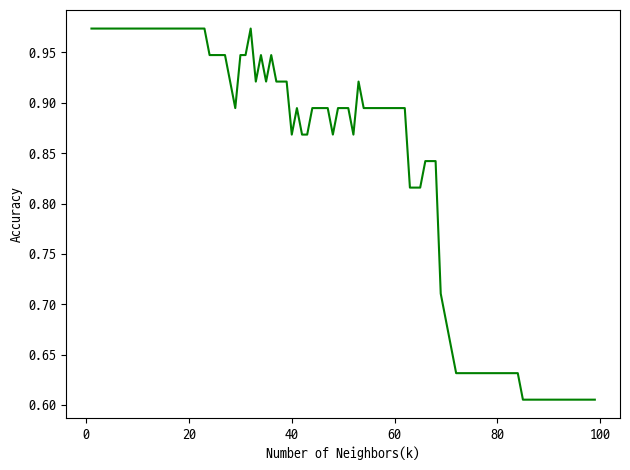

In [53]:
# 시각화
plt.plot(range(1, ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(k)')
plt.tight_layout()
plt.show()

## 와인 데이터
- 와인의 화학 성분을 사용하여 와인의 종류를 예측하기 위한 데이터셋

In [131]:
from sklearn.datasets import load_wine
wine = load_wine()

In [132]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [133]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=255)

In [135]:
X_train.shape

(133, 13)

In [136]:
X_test.shape

(45, 13)

In [139]:
wine_df = pd.DataFrame(X_train, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0
1,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0
2,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
3,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
4,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
129,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0
130,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
131,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0


In [125]:
ks = 100
mean_acc = np.zeros((ks-1))
for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)

print(mean_acc.max())

0.7555555555555555


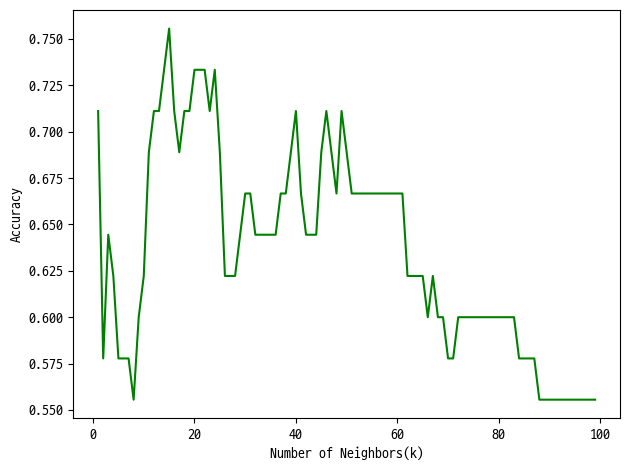

In [126]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(k)')
plt.tight_layout()
plt.show()

In [127]:
kn = KNeighborsClassifier(n_neighbors=14)
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [128]:
y_pred = kn.predict(X_test)

In [129]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(i+1, wine['target_names'][yhat]))

1 : class_0
2 : class_1
3 : class_1
4 : class_2
5 : class_1
6 : class_1
7 : class_1
8 : class_1
9 : class_1
10 : class_0
11 : class_0
12 : class_2
13 : class_2
14 : class_1
15 : class_1
16 : class_2
17 : class_1
18 : class_0
19 : class_2
20 : class_2
21 : class_1
22 : class_1
23 : class_0
24 : class_1
25 : class_0
26 : class_1
27 : class_1
28 : class_0
29 : class_1
30 : class_0
31 : class_2
32 : class_0
33 : class_2
34 : class_1
35 : class_0
36 : class_0
37 : class_2
38 : class_2
39 : class_1
40 : class_0
41 : class_2
42 : class_1
43 : class_1
44 : class_0
45 : class_1


In [130]:
print('테스트 데이터의 정확도 : {:.2f}'.format(kn.score(X_test, y_test)))

테스트 데이터의 정확도 : 0.73


## 유방암 진단 데이터
- 유방암(breast cancer) 진단 데이터 세트
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특정값을 사용하여 종양이 양성(bengin)인지 악성(malignant)인지 판별

In [109]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=255)

In [111]:
X_train.shape

(426, 30)

In [112]:
X_test.shape

(143, 30)

In [113]:
ks = 100
mean_acc = np.zeros((ks-1))
for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)

print(np.where(mean_acc == mean_acc.max()))

(array([ 0,  6,  7,  8,  9, 10, 11], dtype=int64),)


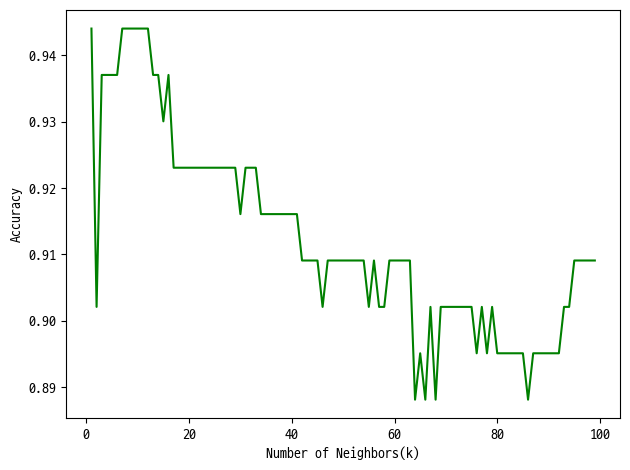

In [114]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(k)')
plt.tight_layout()
plt.show()

In [115]:
kn = KNeighborsClassifier(n_neighbors=11, )
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [116]:
y_pred = kn.predict(X_test)

In [117]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(i+1, cancer['target_names'][yhat]))

1 : malignant
2 : malignant
3 : malignant
4 : malignant
5 : malignant
6 : malignant
7 : malignant
8 : benign
9 : benign
10 : benign
11 : benign
12 : benign
13 : benign
14 : benign
15 : benign
16 : malignant
17 : benign
18 : benign
19 : malignant
20 : benign
21 : benign
22 : benign
23 : benign
24 : benign
25 : benign
26 : malignant
27 : benign
28 : benign
29 : benign
30 : benign
31 : malignant
32 : benign
33 : malignant
34 : malignant
35 : benign
36 : malignant
37 : benign
38 : benign
39 : benign
40 : benign
41 : benign
42 : benign
43 : benign
44 : benign
45 : benign
46 : benign
47 : malignant
48 : malignant
49 : benign
50 : benign
51 : malignant
52 : malignant
53 : benign
54 : malignant
55 : benign
56 : benign
57 : benign
58 : malignant
59 : benign
60 : malignant
61 : benign
62 : malignant
63 : malignant
64 : malignant
65 : benign
66 : malignant
67 : benign
68 : benign
69 : benign
70 : benign
71 : benign
72 : benign
73 : benign
74 : benign
75 : benign
76 : benign
77 : malignant
78 : be

In [118]:
print('테스트 데이터의 정확도 : {:.2f}'.format(kn.score(X_test, y_test)))

테스트 데이터의 정확도 : 0.94
